In [14]:
!pip install gym torch numpy matplotlib

Learned Q-values:
[[34.93520124  0.        ]
 [35.41122006  0.        ]
 [35.37761851  0.        ]
 [35.92230534  0.        ]
 [36.56397602  0.        ]]


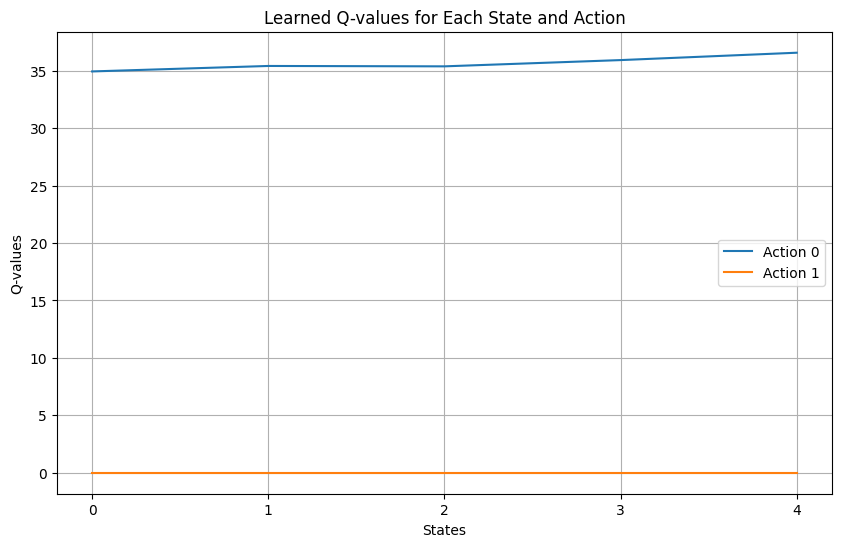

In [19]:
import numpy as np
import random
import matplotlib.pyplot as plt

class NStepQLearning:
    def __init__(self, state_size, action_size, n=3, alpha=0.1, gamma=0.99):
        self.state_size = state_size
        self.action_size = action_size
        self.n = n
        self.alpha = alpha
        self.gamma = gamma
        self.Q = np.zeros((state_size, action_size))  # Initialize Q-values
        self.memory = []  # Store (reward, next_state) tuples

    def select_action(self, state, epsilon):
        """Select action using epsilon-greedy policy."""
        if random.random() < epsilon:
            return random.randint(0, self.action_size - 1)  # Explore
        return np.argmax(self.Q[state])  # Exploit

    def update(self, state, reward, next_state):
        """Update Q-values using n-step return."""
        self.memory.append((reward, next_state))

        if len(self.memory) >= self.n:
            # Compute n-step return
            G = sum(self.gamma ** i * self.memory[i][0] for i in range(self.n))
            G += self.gamma ** self.n * self.Q[self.memory[self.n - 1][1]].max()  # Value of the next state

            # Update Q-value for the first state in the n-step return
            first_state = state  # state at time t
            action = self.select_action(first_state, 0)  # Action taken at time t
            self.Q[first_state][action] += self.alpha * (G - self.Q[first_state][action])

            # Remove the first entry from memory
            self.memory.pop(0)

# Example environment (simple grid world)
class SimpleEnv:
    def __init__(self, state_size):
        self.state_size = state_size

    def reset(self):
        """Reset the environment to an initial state."""
        return random.randint(0, self.state_size - 1)  # Random starting state

    def step(self, state, action):
        """Take an action and return the next state and reward."""
        # Simple reward structure: reward 1 for reaching the last state
        if action == 0:  # Move right
            next_state = min(state + 1, self.state_size - 1)
        else:  # Move left
            next_state = max(state - 1, 0)

        reward = 1 if next_state == self.state_size - 1 else 0
        return next_state, reward

# Parameters
state_size = 5  # Number of states
action_size = 2  # Number of actions (0: left, 1: right)
n = 3  # Number of steps for n-step Q-learning
alpha = 0.1  # Learning rate
gamma = 0.99  # Discount factor
epsilon = 0.1  # Exploration probability
episodes = 1000  # Number of episodes

# Initialize environment and agent
env = SimpleEnv(state_size)
agent = NStepQLearning(state_size, action_size, n, alpha, gamma)

# Training loop
for episode in range(episodes):
    state = env.reset()  # Reset the environment
    done = False

    while not done:
        action = agent.select_action(state, epsilon)  # Select action
        next_state, reward = env.step(state, action)  # Take action
        agent.update(state, reward, next_state)  # Update Q-values
        state = next_state  # Transition to the next state

        # Terminate if the last state is reached
        if state == state_size - 1:
            done = True

# Display learned Q-values
print("Learned Q-values:")
print(agent.Q)

# Plotting the learned Q-values
plt.figure(figsize=(10, 6))
for action in range(action_size):
    plt.plot(agent.Q[:, action], label=f'Action {action}')
plt.title('Learned Q-values for Each State and Action')
plt.xlabel('States')
plt.ylabel('Q-values')
plt.xticks(np.arange(state_size))
plt.legend()
plt.grid()
plt.show()
